In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Cargar el archivo Excel en un DataFrame de Pandas
df = pd.read_excel("AirQualityUCI.xlsx")

In [18]:
# Utilizar el método info() para obtener información sobre el DataFrame
print("Información del DataFrame:")
print(df.info())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       

In [19]:
# Utilizar el método describe() para obtener estadísticas descriptivas del DataFrame
print("\nDescripción del DataFrame:")
print(df.describe())


Descripción del DataFrame:
                                Date       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                           9357  9357.000000  9357.000000  9357.000000   
mean   2004-09-21 04:30:05.193972480   -34.207524  1048.869652  -159.090093   
min              2004-03-10 00:00:00  -200.000000  -200.000000  -200.000000   
25%              2004-06-16 00:00:00     0.600000   921.000000  -200.000000   
50%              2004-09-21 00:00:00     1.500000  1052.500000  -200.000000   
75%              2004-12-28 00:00:00     2.600000  1221.250000  -200.000000   
max              2005-04-04 00:00:00    11.900000  2039.750000  1189.000000   
std                              NaN    77.657170   329.817015   139.789093   

          C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count  9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   
mean      1.865576     894.475963   168.604200    794.872333    58.135898   
min    -200.000000    -200.00

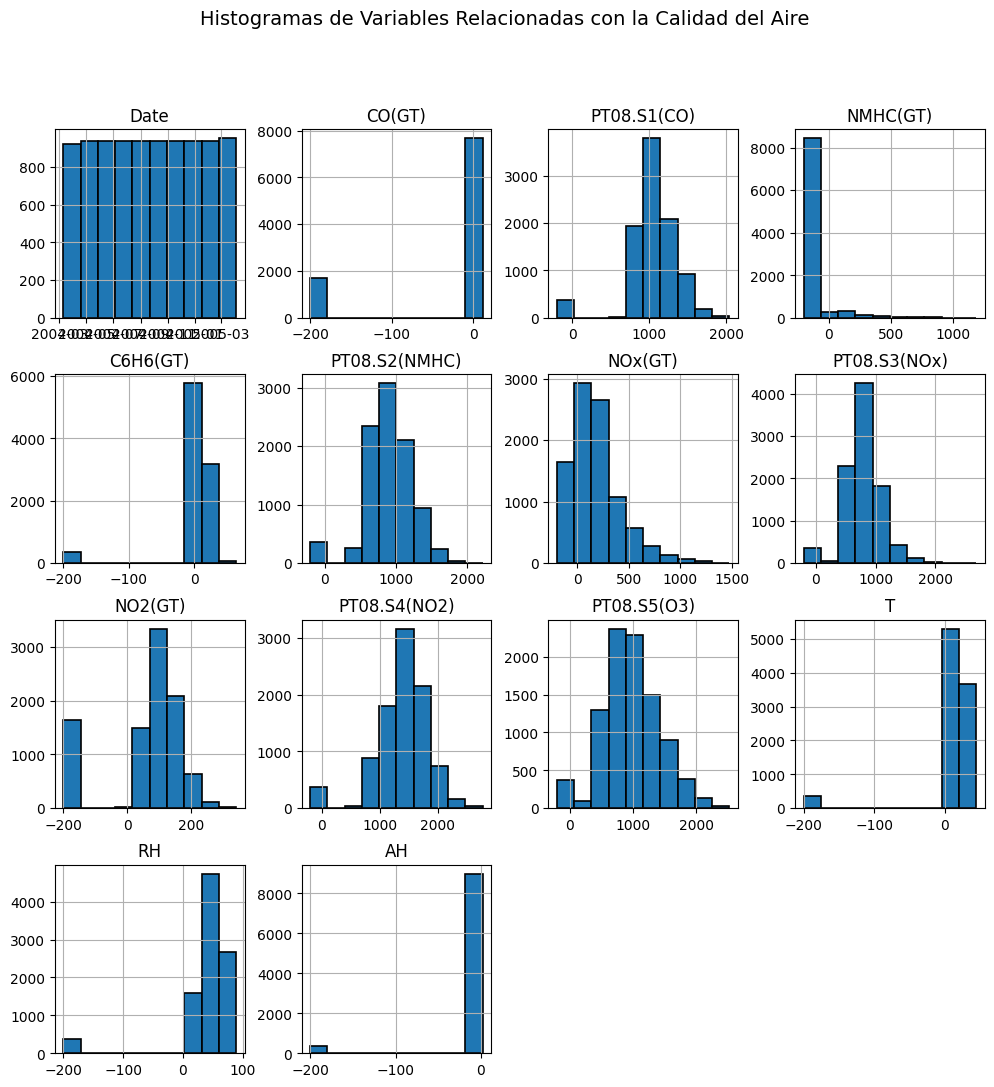

In [20]:

df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.suptitle('Histogramas de Variables Relacionadas con la Calidad del Aire', fontsize=14)
plt.show()

In [21]:
def convert_date_to_numeric(df):
    # Convertir 'Date' a tipo datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    # Asignar un valor numérico secuencial a cada fecha
    df['Numeric_Date'] = (df['Date'] - df['Date'].min()).dt.days + 1
    return df

df = convert_date_to_numeric(df)

In [22]:
def extract_hour(df):
    # Convertir 'Time' a tipo datetime
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    # Extraer la hora de 'Time'
    df['Hour'] = df['Time'].dt.hour
    return df

df = extract_hour(df)

In [23]:
# Mostrar las primeras filas del DataFrame
print(df.head())

        Date                Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10 1900-01-01 18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10 1900-01-01 19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10 1900-01-01 20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10 1900-01-01 21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10 1900-01-01 22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  Numeric_Date  Hour  
0  1

In [24]:
# Reemplazar -200 (valores faltantes) por NaN
df.replace(-200, np.nan, inplace=True)

In [30]:
 #Asegurarse de que todas las columnas sean numéricas
df = df.apply(pd.to_numeric)

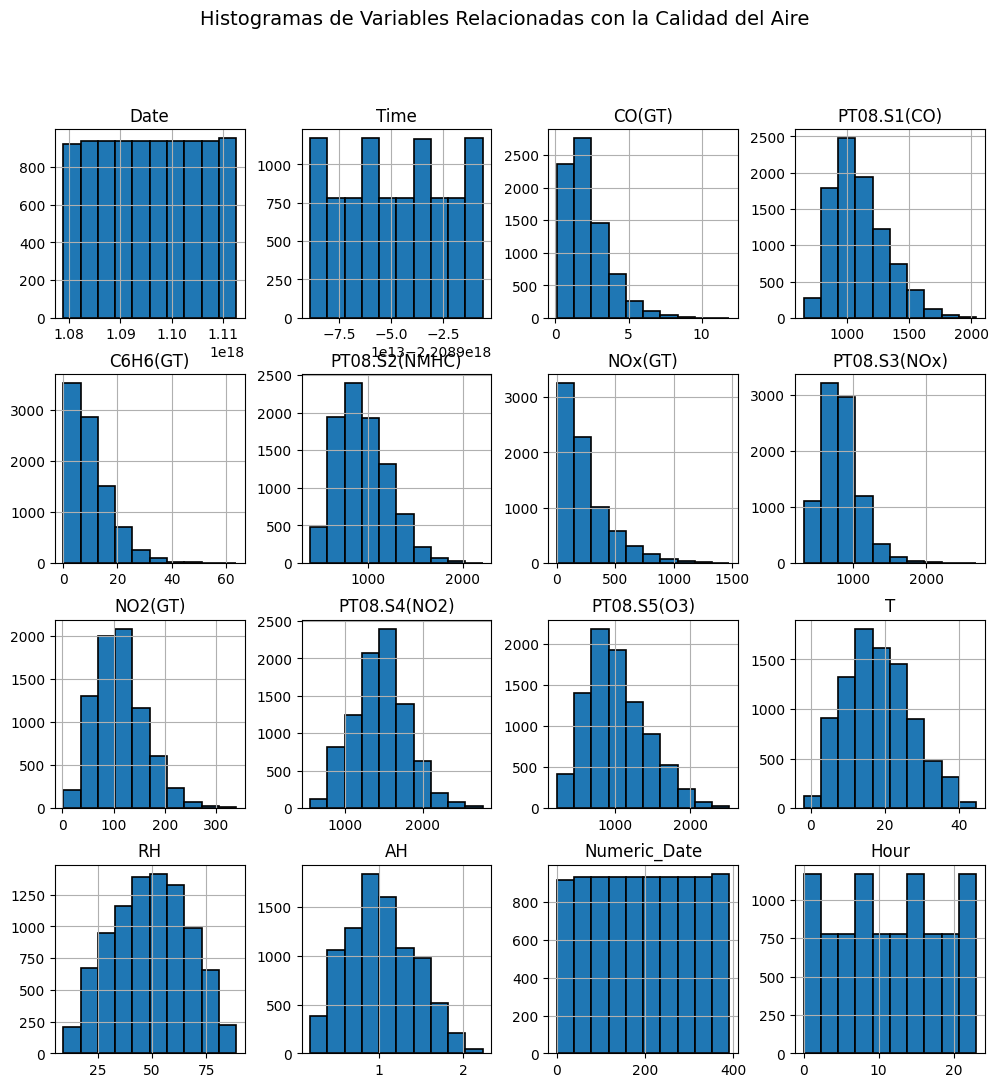

In [37]:
# Incorporar el código para visualizar histogramas de las variables relacionadas con la calidad del aire excluyendo 'aire'
air_quality_data = df.drop(['NMHC(GT)'], axis=1)
air_quality_data.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.suptitle('Histogramas de Variables Relacionadas con la Calidad del Aire', fontsize=14)
plt.show()

In [36]:
# Utilizar KNNImputer para imputar valores faltantes
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


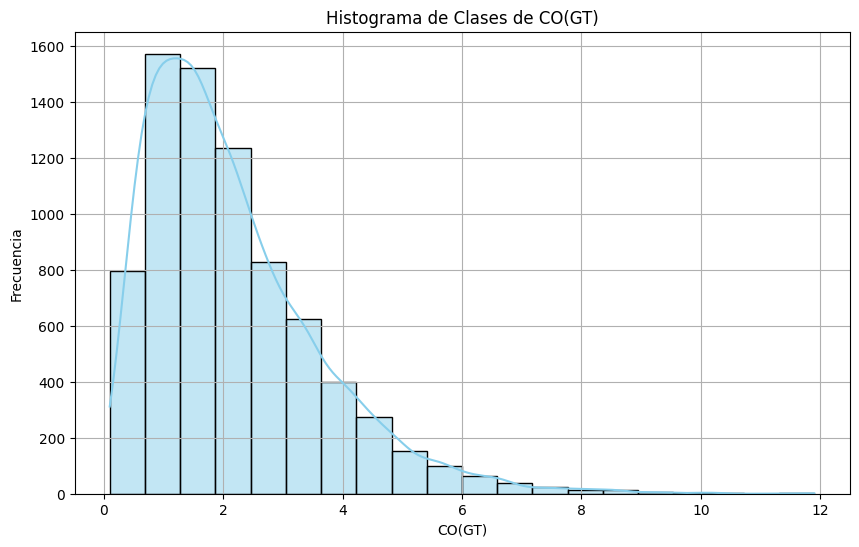

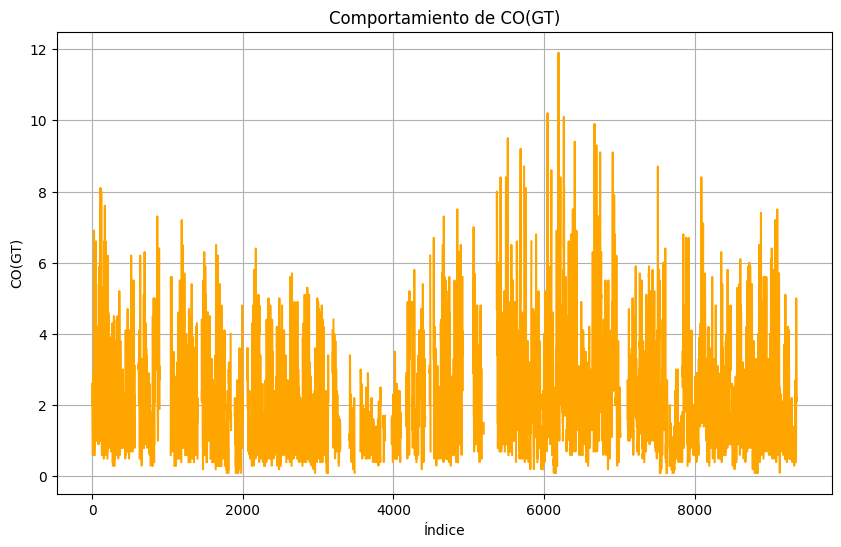

In [34]:

# Histograma de clases
plt.figure(figsize=(10, 6))
sns.histplot(df['CO(GT)'], bins=20, kde=True, color='skyblue')
plt.title('Histograma de Clases de CO(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Gráfica de línea para observar el comportamiento de la variable CO(GT)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CO(GT)'], color='orange')
plt.title('Comportamiento de CO(GT)')
plt.xlabel('Índice')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()


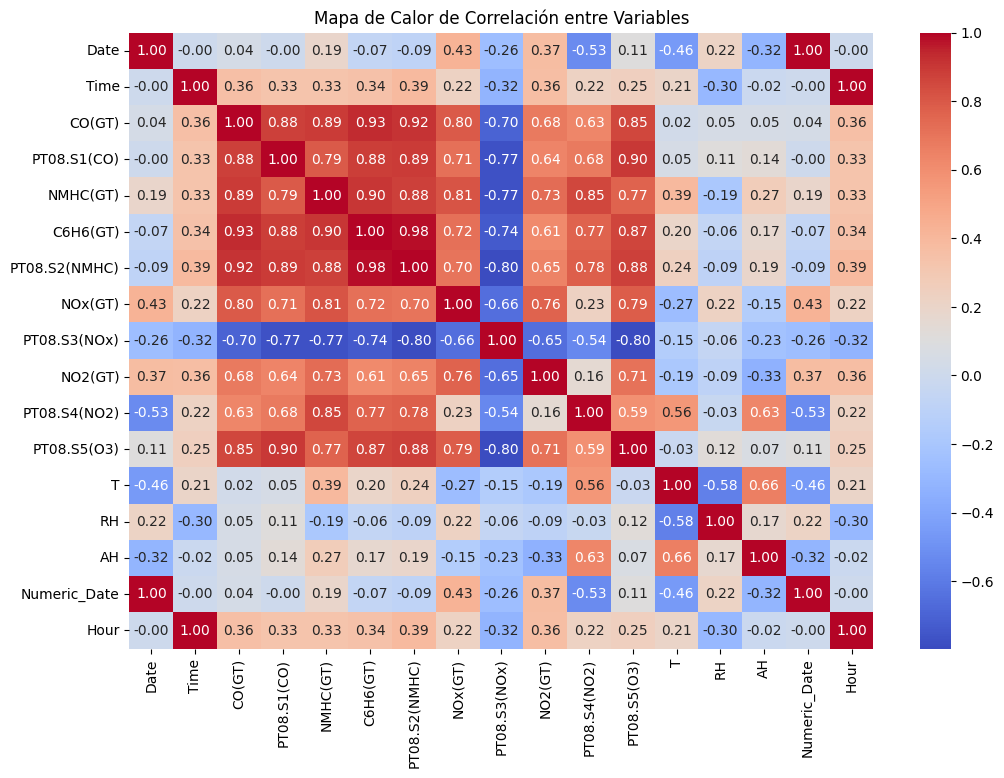

In [35]:
# Mapa de calor de correlación entre las variables predictoras
plt.figure(figsize=(12, 8))
# Seleccionamos solo las columnas numéricas para el mapa de calor
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()